Tier                     "ZU"
Predictions              "ZU"
Pokemon Name       "Lumineon"
Base Stat Total           460
Name: 658, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Applin"
Base Stat Total         260
Name: 38, dtype: object
Tier                   "UBER"
Predictions            "UBER"
Pokemon Name       "Koraidon"
Base Stat Total           670
Name: 604, dtype: object
Tier                      "ZU"
Predictions               "ZU"
Pokemon Name       "Bounsweet"
Base Stat Total            210
Name: 113, dtype: object
Tier                   "ZU"
Predictions            "UU"
Pokemon Name       "Raikou"
Base Stat Total         580
Name: 929, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Geodude"
Base Stat Total          300
Name: 437, dtype: object
Tier                 "UBER"
Predictions          "UBER"
Pokemon Name       "Kyurem"
Base Stat Total         700
Name: 615, dtype: object
Tier      

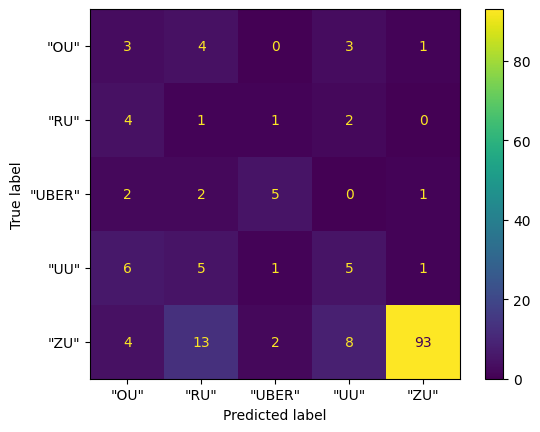

In [105]:
#Predicting Tier based off features
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Owner/Downloads/POKEMON DATASET/Pokemon Database W Tiers.csv")
#features = ["Legendary Type","Primary Type","Secondary Type","Game(s) of Origin","Health Stat","Attack Stat","Defense Stat","Special Attack Stat","Special Defense Stat","Speed Stat","Base Stat Total"]
data = data.dropna(subset="Tier")
irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

#I removed "Pokemon Name" from above so I could check what pokemon where catogorized as what
data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
features = data.columns.values[2:]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])



# for i in range(trainX.shape[1]):
#     plt.hist(trainX[0][i])
#     plt.hist(testX[0][i])
#plt.hist(trainY)
#plt.hist(testY)
#plt.show()

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
disp.plot()
plt.show()



In [106]:
numberOfCoefs = 3
for i, tier in enumerate(model.classes_):
    print(tier)
    sortedCoefs = np.argsort(model.coef_[i])
    for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
    for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
        


"OU"
Primary Type_"Ice"
-1.3458148677071486
Primary Type_"Ghost"
-1.1433984463348592
Secondary Type_"Normal"
-1.1023779205928173
Primary Type_"Dragon"
0.6508541015580473
Primary Type_"Flying"
0.8281726594660987
Secondary Type_"Ground"
0.8553267760471522
"RU"
Primary Type_"Fairy"
-1.2953732834713776
Secondary Type_"Dragon"
-1.0589364729642818
Primary Type_"Ground"
-1.0532380237735004
Primary Type_"Normal"
1.2961669802344942
Secondary Type_"Bug"
1.5675675466034173
Secondary Type_"Poison"
1.751450494364045
"UBER"
Secondary Type_"Fighting"
-1.4259528101415333
Secondary Type_"Psychic"
-1.3993787293601194
Primary Type_"Dragon"
-0.7938021237055936
Primary Type_"Ghost"
1.270409858890423
Secondary Type_"Fairy"
1.2886792619817247
Secondary Type_"Fire"
1.4557091452762736
"UU"
Primary Type_"Normal"
-1.279060211808452
Secondary Type_"Fire"
-1.0699119687533774
Primary Type_"Fighting"
-0.9633243558302962
Primary Type_"Ice"
0.9448657968212418
Secondary Type_"Dark"
1.209423689836341
Secondary Type_"Gho

Tier                  "ZU"
Predictions           "UU"
Pokemon Name       "Rotom"
Base Stat Total        520
Name: 967, dtype: object
Tier                "ZU"
Predictions         "RU"
Pokemon Name       "Mew"
Base Stat Total      600
Name: 735, dtype: object
Tier                      "UU"
Predictions               "ZU"
Pokemon Name       "Azumarill"
Base Stat Total            420
Name: 67, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Rellor"
Base Stat Total         270
Name: 947, dtype: object
Tier                  "ZU"
Predictions           "ZU"
Pokemon Name       "Snivy"
Base Stat Total        308
Name: 1082, dtype: object
Tier                   "ZU"
Predictions            "UU"
Pokemon Name       "Pyroar"
Base Stat Total         507
Name: 911, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Magmar"
Base Stat Total         495
Name: 681, dtype: object
Tier                      "OU"
Predictions       

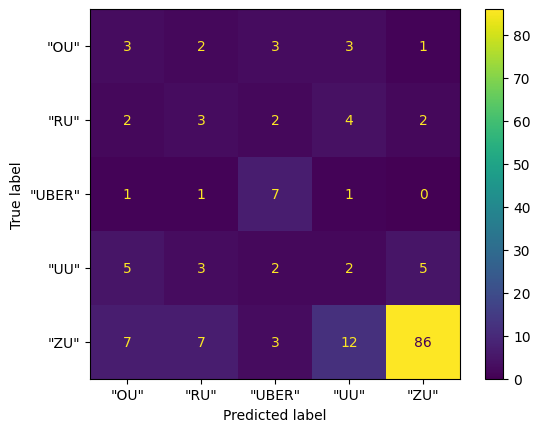

In [107]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")
dataAgain = pd.read_csv("C:/Users/Owner/Downloads/POKEMON DATASET/Pokemon Database W Tiers.csv")
dataAgain = dataAgain.dropna(subset="Tier")

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

dataAgain = dataAgain.drop(labels=irrelevantFeatures,axis=1)
dataAgain = pd.get_dummies(dataAgain,columns=["Primary Type","Secondary Type"])
features = dataAgain.columns.values[5:]
abilityFeatures = dataAgain.columns.values[2:5]
#print(features)
#print(abilityFeatures)

#x = np.array(data[features])
#y = np.array(data["Tier"])
#print(x)
#print(y)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

dataAgain = dataAgain.fillna(value="")

trainData, testData = train_test_split(dataAgain,test_size=0.2)

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])



# for i in range(trainX.shape[1]):
#     plt.hist(trainX[0][i])
#     plt.hist(testX[0][i])
#plt.hist(trainY)
#plt.hist(testY)
#plt.show()

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
disp.plot()
plt.show()

In [108]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Owner/Downloads/POKEMON DATASET/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Tier", "Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])


Pokemon Name    "Primeape"
Gen                      1
Predictions       5.473117
Name: 899, dtype: object
Pokemon Name    "Swadloon"
Gen                      5
Predictions       5.124618
Name: 1133, dtype: object
Pokemon Name    "Chimecho"
Gen                      3
Predictions       3.807036
Name: 183, dtype: object
Pokemon Name    "Graveler"
Gen                      1
Predictions       3.872303
Name: 486, dtype: object
Pokemon Name    "Rattata"
Gen                     7
Predictions       7.81838
Name: 937, dtype: object
Pokemon Name    "Metapod"
Gen                     1
Predictions      4.143407
Name: 734, dtype: object
Pokemon Name    "Graveler"
Gen                      7
Predictions        5.66233
Name: 485, dtype: object
Pokemon Name    "Munkidori"
Gen                       9
Predictions        4.706276
Name: 779, dtype: object
Pokemon Name    "Oinkologne"
Gen                        9
Predictions         5.054807
Name: 817, dtype: object
Pokemon Name    "Taillow"
Gen             

In [109]:
numberOfCoefs = 3
sortedCoefs = np.argsort(model.coef_)
for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
    print(features[coefficientIndex])
    print(model.coef_[coefficientIndex])
for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
    print(features[coefficientIndex])
    print(model.coef_[coefficientIndex])

Primary Type_"Ground"
-1.0515452238115894
Secondary Type_"Ground"
-0.8892377615959315
Primary Type_"Psychic"
-0.8834532715385142
Secondary Type_"Bug"
2.2190083189346224
Secondary Type_"Ghost"
2.485746304506919
Secondary Type_"Normal"
2.964180997725813
